# CMPE 252 - HOME ASSIGNMENT 1 - A* SEARCH

### Plotting the nodes and edges for the graph

Sanitizing the sgb128_xy.txt file into desired format. Removing 7 junk line(s)
Sanitizing the sgb128_dist.txt file into desired format. Removing 7 junk line(s)
Sanitizing the sgb128_name.txt file into desired format. Removing 2 junk line(s)
Plotting the nodes and edges on the graph - 


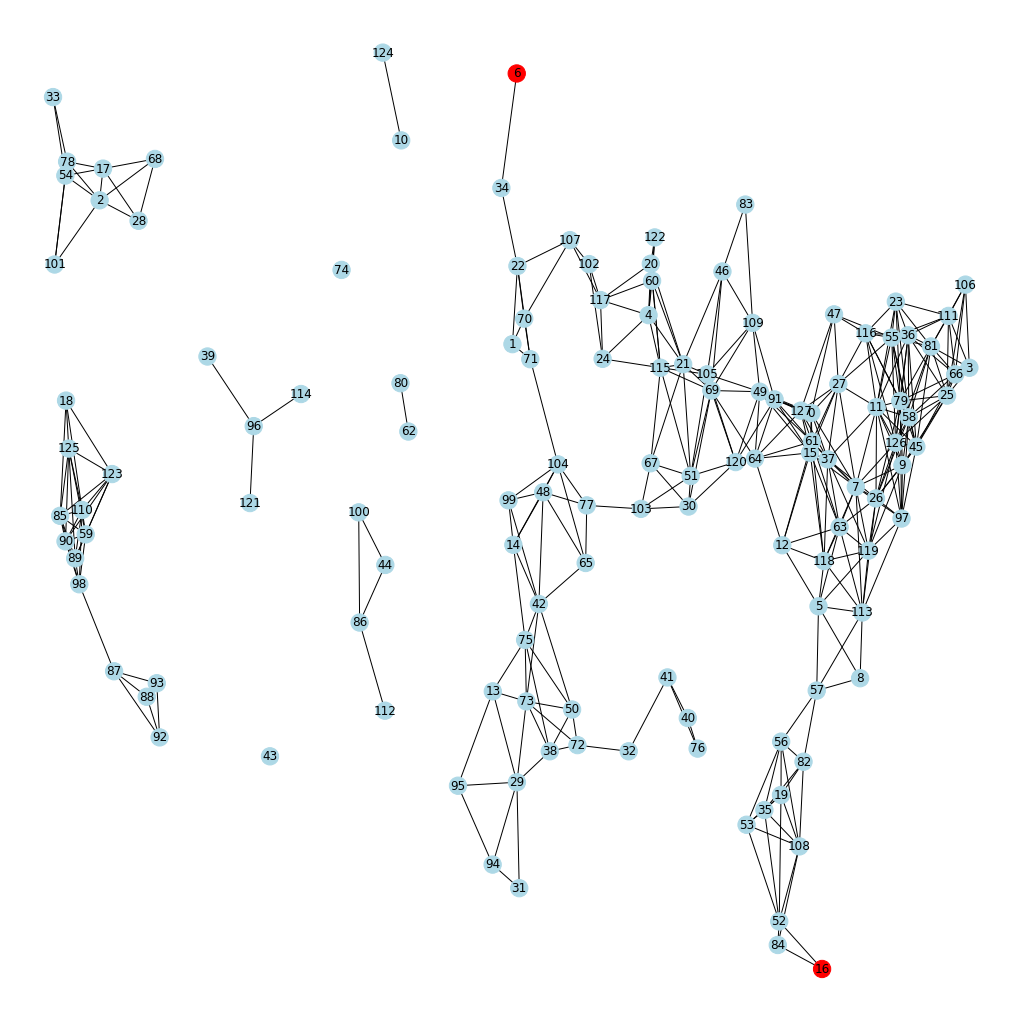

In [55]:
import urllib
import matplotlib.pyplot as plt
import networkx as nx
import re
from scipy.spatial import distance
import json

node_path = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_xy.txt"
edge_path = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_dist.txt"
city_path = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_name.txt"

G = nx.Graph() 

def customize_text_file(file_url, file_op_name, num_lines=None):
    xy = []
    file_txt = urllib.request.urlopen(file_url).read().decode("utf-8")
    file_lines = file_txt.splitlines(True)
    print("Sanitizing the {filename} file into desired format. Removing {num_lines} junk line(s)".format(
        filename= file_url.split("/")[-1], num_lines=num_lines))
    file_custom = file_lines[num_lines:]
    for i in file_custom:
        xyc = re.split('\s+', i.strip())
        xy.append(xyc)
    return xy

def calculate_euclidean_distances(nodes):
        index = 0
        euclid_lengths = {}
        for i in nodes:
            a = [float(i[0]),float(i[1])]
            euclid_dict = {}
            for j in range(0,len(nodes)):
                b = [float(nodes[j][0]),float(nodes[j][1])]
                ed = distance.euclidean(a, b)
                euclid_dict[j] = ed
                # print("Distance between source - '{source}' and target '{target}' is {ed}".format(source=i,
                #      target = self.nodes[j],ed = ed))
            euclid_lengths[index] = euclid_dict
            index = index + 1
        euclid_lengths = euclid_lengths
        return euclid_lengths

class device():
    def __init__(self, name):
        self.name = name
        self.coords = (0,0)
    def __repr__(self):
        return self.name

devices = []
index = 0


nodes = customize_text_file(node_path, "nodes.txt", 7)
edges = customize_text_file(edge_path, "edges.txt", 7)
cities = customize_text_file(city_path, "cities.txt", 2)
city_list = []
for c in cities: 
    city = c[0]+ " " + c[1]
    city_list.append(city)
# cities_flattened = [item for sublist in cities for item in sublist]
ec = calculate_euclidean_distances(nodes)


for i in nodes:
    coords = (float(i[0]),float(i[1]))
    G.add_node(index,pos=coords) 
    index = index + 1
    
G.add_nodes_from(devices)

source = 0
destination = 0

for i in edges:
#     print("The edges for index {source} are - {edges}".format(source=str(source), edges=i))
    destination = 0
    for j in i:
        w = float(j)
        ed = euclid_lengths[source][destination]
        if ed<=230:
#             print("Adding edge between {source} and {destination} with weight {weight}".format(
#                                                         source=str(source),
#                                                     destination = str(destination), weight = j))
            G.add_edge(source,destination, weight=w)
        else:
            pass
#             print("The euclidean distance ({ed}) between {source} and {destination}
#             with weight {weight} is greater than 230".format(
#                     source=source,destination = destination, weight = j, ed=ed))
        destination = destination + 1
    source = source + 1

print("Plotting the nodes and edges on the graph - ")
pos=nx.get_node_attributes(G,'pos')
color_map = []
for node in G:
    if node in [6,16]:
        color_map.append('red')
    else: 
        color_map.append('lightblue') 
        
# nx.draw(G,pos=pos, with_labels = True, node_color='lightblue')
plt.figure(2,figsize=(14,14)) 

nx.draw(G,pos=pos, with_labels = True, node_size=300,font_size=12, node_color=color_map)

# plt.show()
# print(G.edges(data=True))


## Plotting the shortest straight path with Euclidean distance heuristic

A* with Euclidean Heuristic and W [6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]
Astar length 11588.0
6 {'pos': (-6712.64, 3446.49)} Winnipeg, MB
34 {'pos': (-6772.07, 3241.95)} Valley City,
22 {'pos': (-6709.88, 3102.4)} Watertown, SD
71 {'pos': (-6660.11, 2935.87)} Sioux City,
104 {'pos': (-6553.01, 2747.93)} Saint Joseph,
77 {'pos': (-6441.79, 2674.67)} Sedalia, MO
103 {'pos': (-6231.74, 2668.46)} Saint Louis,
51 {'pos': (-6039.65, 2727.21)} Terre Haute,
105 {'pos': (-5975.39, 2908.91)} Saint Joseph,
49 {'pos': (-5772.25, 2877.83)} Toledo, OH
61 {'pos': (-5570.49, 2788.7)} Steubenville, OH
118 {'pos': (-5523.51, 2575.2)} Roanoke, VA
119 {'pos': (-5351.44, 2593.85)} Richmond, VA
113 {'pos': (-5375.64, 2483.28)} Rocky Mount,
57 {'pos': (-5551.82, 2343.71)} Sumter, SC
56 {'pos': (-5689.32, 2252.5)} Swainsboro, GA
35 {'pos': (-5754.27, 2130.2)} Valdosta, GA
52 {'pos': (-5696.92, 1931.22)} Tampa, FL
16 {'pos': (-5531.11, 1846.22)} West Palm


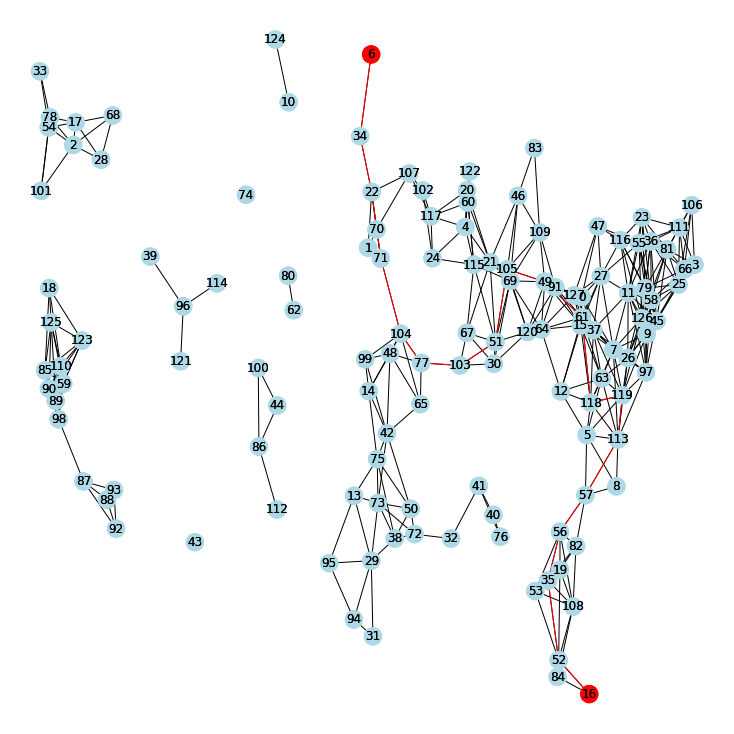

In [45]:
def dist(a, b):
    
    (x1, y1) = (float(nodes[a][0]), float(nodes[a][1]))
    (x2, y2) = (float(nodes[b][0]), float(nodes[b][1]))
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5 *1

path = nx.astar_path(G, 6, 16, heuristic=dist, weight='weight')
print("A* with Euclidean Heuristic and W", path)
print("Astar length", nx.astar_path_length(G, 6, 16, heuristic=dist, weight='weight'))
for i in path:
    print(i, G.nodes.get(i), city_list[int(i)])
path_edges = zip(path,path[1:])
path_edges = set(path_edges)
plt.figure(2,figsize=(10,10)) 


nx.draw(G,pos=pos, with_labels = True, node_size=300,font_size=12, node_color=color_map)
nx.draw(G,pos=pos, edgelist=path_edges, edge_color='r', with_labels = True, node_size=300,font_size=12, node_color=color_map)

### Try different weights, W, for the heuristic, in particular 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 and record your observations on the impact of the weight on the ability of the algorithm to find the shortest path between the Source and the Destination**

In [48]:
solutions = list()
for w in range(1, 11):
    def weighted_euclidean_distance(a, b, W=w):
        (x1, y1) = (float(nodes[a][0]), float(nodes[a][1]))
        (x2, y2) = (float(nodes[b][0]), float(nodes[b][1]))
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5 * W
    
    solutions.append(nx.algorithms.shortest_paths.astar_path(G, 6,
                    16, heuristic=weighted_euclidean_distance, weight="weight"))

solutions = pd.DataFrame(solutions).T


solutions.columns = ["W=1", "W=2", "W=3", "W=4", "W=5", "W=6", "W=7", "W=8", "W=9","W=10"]
solutions

,W=1,W=2,W=3,W=4,W=5,W=6,W=7,W=8,W=9,W=10
0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
1,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
2,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
3,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0
4,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0
5,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0
6,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0
7,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0
8,105.0,105.0,105.0,105.0,105.0,105.0,105.0,120.0,120.0,120.0
9,49.0,49.0,49.0,49.0,49.0,49.0,120.0,64.0,64.0,64.0


### Plot the length of the shortest path between "Source and the Destination" for W in [1, 2] with step 0.1. E.g.,  W1 = 1, W2=1.1, W3 = 1.2 etc. 
### X-axis: W, Y-axis the length of the shortest path between "Source and the Destination"**

,W=1.1,W=1.2,W=1.3,W=1.4,W=1.5,W=1.6,W=1.7,W=1.8,W=1.9,W=2
0,"[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]","[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]"
1,11588.0,11588.0,11588.0,11588.0,11588.0,11588.0,11588.0,11588.0,11588.0,11588.0


<Figure size 432x288 with 0 Axes>

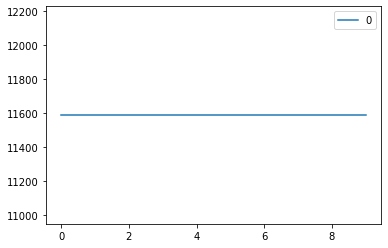

In [86]:
solutions = list()
for w in range(1, 11):
    def weighted_euclidean_distance(a, b, W=w):
        (x1, y1) = (float(nodes[a][0]), float(nodes[a][1]))
        (x2, y2) = (float(nodes[b][0]), float(nodes[b][1]))
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5 * (1 + w/10)
    
    solutions.append([nx.algorithms.shortest_paths.astar_path(G, 6,
                    16, heuristic=weighted_euclidean_distance, weight="weight"), float(nx.astar_path_length(G, 6, 16, heuristic=dist, weight='weight'))] )

solutions1 = pd.DataFrame(solutions).T

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

solutions1.columns = ["W=1.1", "W=1.2", "W=1.3", "W=1.4", "W=1.5", "W=1.6", "W=1.7", "W=1.8", "W=1.9","W=2"]
plt.figure()
all_distances= []
for i in range(0,len(solutions)):
    all_distances.append(solutions[i][1])
alld = pd.DataFrame(all_distances)
alld.plot()
solutions1

### What is the length of the shortest path between the Source and Destination (single_source_dijkstra() from the NetworkX library to compute it)**


In [52]:
print("Djikstra path",nx.single_source_dijkstra(G, 6, 16))

Djikstra path (11588.0, [6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16])
